# White Blood Cells Classification 
White blood cells, also called leukocytes or leucocytes, are cells of the immune system that are involved in protecting the body against both infectious disease and foreign invaders.
<img src='Leucocyte_types.jpg' width=500px>

In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
import numpy as np
import pandas as pd
import torchvision.transforms as T

from model import create_model
from data import create_data_loader

In [2]:
# The directories
data_dir = 'data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

# creating the dataloader
train_data,test_data,valid_data,trainloader , validloader , testloader =create_data_loader(train_dir,valid_dir,test_dir)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model=create_model()

C:\Users\mosta\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mosta\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Training 

In [8]:
epochs = 10
steps = 0
running_loss = 0
print_every = 5

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)
model.to(device)

for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in validloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/10.. Train loss: 18.315.. Test loss: 54.754.. Test accuracy: 1.062
Epoch 1/10.. Train loss: 6.111.. Test loss: 10.334.. Test accuracy: 0.746
Epoch 1/10.. Train loss: 2.279.. Test loss: 5.749.. Test accuracy: 0.949
Epoch 2/10.. Train loss: 1.687.. Test loss: 5.830.. Test accuracy: 0.714
Epoch 2/10.. Train loss: 1.460.. Test loss: 4.808.. Test accuracy: 2.258
Epoch 2/10.. Train loss: 1.426.. Test loss: 3.984.. Test accuracy: 2.269
Epoch 3/10.. Train loss: 1.131.. Test loss: 3.730.. Test accuracy: 2.348
Epoch 3/10.. Train loss: 1.082.. Test loss: 3.247.. Test accuracy: 2.502
Epoch 3/10.. Train loss: 1.020.. Test loss: 2.875.. Test accuracy: 2.576
Epoch 3/10.. Train loss: 0.911.. Test loss: 2.540.. Test accuracy: 2.772
Epoch 4/10.. Train loss: 0.863.. Test loss: 2.501.. Test accuracy: 2.725
Epoch 4/10.. Train loss: 0.828.. Test loss: 2.356.. Test accuracy: 2.917
Epoch 4/10.. Train loss: 0.824.. Test loss: 2.327.. Test accuracy: 2.847
Epoch 5/10.. Train loss: 0.726.. Test loss: 1.98

In [10]:
accuracy = 0
model.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        logps = model.forward(inputs)
        ps = torch.exp(logps)
        
        top_k, top_class = ps.topk(1, dim=1)
        equals = top_class  == labels.view(*top_class.shape)
        
        accuracy += torch.mean(equals.type(torch.FloatTensor))#.item()
        
    print(f"Accuracy: {accuracy/len(validloader)}")

Accuracy: 0.23333333432674408


In [11]:
model.class_to_idx =train_data.class_to_idx

# Saving The Model

In [12]:
checkpoint = {'pretrained_weights': model.state_dict(),
              'classifier':  model.classifier,
              'mapping': model.class_to_idx,
              'state_dict': model.state_dict(),
              'model_architecture': 'vgg16',
              'optimizer' : optimizer.state_dict(),
              'optimizer_algorithm': 'Adam',
              'epochs': epoch,
              'batch_size': 64 ,
              'learning_rate': 0.003 ,
              'classifier_input_size': 25088,
              'classifier_output_size': 102,
              'hidden_layers':1000
              } 
torch.save(checkpoint , 'checkpoint.pth')

# Loading The Model

In [13]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = models.vgg16(pretrained=True)
    classifier = checkpoint['classifier']
    model.classifier=classifier
    model.class_to_idx = checkpoint ['mapping']
    model.load_state_dict (checkpoint ['state_dict'])
    lr = checkpoint['learning_rate']
    inp_size = checkpoint['classifier_input_size']
    out_size = checkpoint['classifier_output_size']
    batch_size = checkpoint['batch_size']
    for param in model.parameters(): 
        param.requires_grad = False 
    return model

In [14]:
model=load_checkpoint('checkpoint.pth')

# Testing The Model

In [15]:
def process_image( image):
    image=Image.open(image)
    if image.size[0] > image.size[1]:
        aspect = image.size[1] / 256
        new_size = (image.size[0] / aspect, 256)   
    else:
        aspect = image.size[0] / 256
        new_size = (256, image.size[1] / aspect)
    image.thumbnail(new_size, Image.ANTIALIAS)
        
    width, height = image.size # Get dimensions
    left = (width - 224) / 2
    top = (height - 224) / 2
    right = (width + 224) / 2
    bottom = (height + 224) / 2
    image = image.crop((left, top, right, bottom))
    np_image = np.array(image)
    np_image = np.transpose(np_image, (2, 0, 1)) # HWC -> CxHxW format.
    np_image = np_image / 255.0
    for h in range(np_image.shape[1]):
        for w in range(np_image.shape[2]):
            np_image[0, h, w] = ((np_image[0, h, w] - 0.485) / 0.229)
            np_image[1, h, w] = ((np_image[1, h, w] - 0.456) / 0.224)
            np_image[2, h, w] = ((np_image[2, h, w] - 0.406) / 0.225)
    
    
        
    return np_image

In [16]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))

        # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

        # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.axis('off')
    return ax

In [17]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    image=process_image(image_path)
    inputs = torch.tensor(np.array([image])).type(torch.FloatTensor)
    
    inputs = inputs.to(device)
    with torch.no_grad():
        
        logps = model.forward(inputs)
        ps = torch.exp(logps)
        ps=ps.cpu()
        probs, classes = ps.topk(topk, dim=1)
    probs = probs.tolist()[0]
    class_to_idx = train_data.class_to_idx
    idx_to_class = {value:key for key, value in class_to_idx.items()}
    classes=classes.tolist()[0]
    classes = [idx_to_class[i] for i in classes]
    return (probs,classes)
    print(probs)
    print(classes)

C:\Users\mosta\AppData\Local\Temp\ipykernel_16064\286981166.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image.thumbnail(new_size, Image.ANTIALIAS)


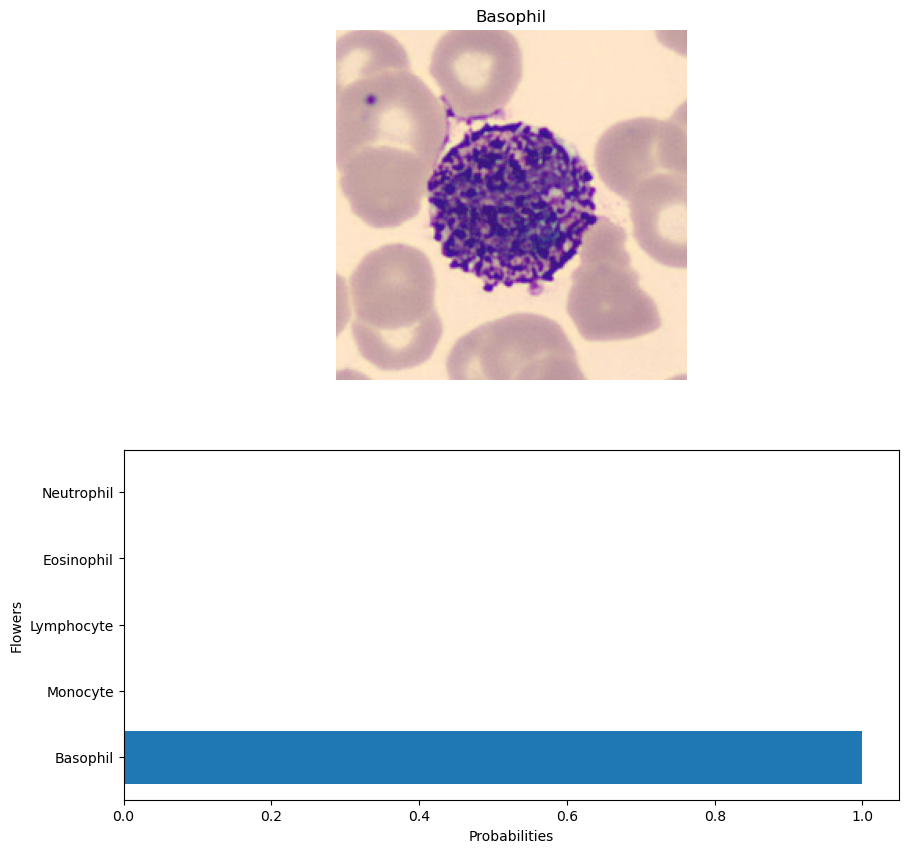

In [23]:
def sanity_checking(image_path, model, device):
    
    fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(10,10))
    image=process_image(image_path)
    probabilities, classes = predict(image_path, model, 5)
    imshow(image, ax=ax1)
    ax1.set_title(classes[0])
    ax1.axis('off')
# Display probabilities bar chart

    classes=[i for i in classes]

    ax2.barh(classes, probabilities)

    ax2.set_ylabel("Flowers")

    ax2.set_xlabel("Probabilities")

    plt.show()
    
image_path = '1.jpg'

sanity_checking(image_path, model, device)